In [1]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from get_loader import get_loader
from model import CNNtoRNN


def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)


def load_checkpoint(checkpoint, model, optimizer):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])
    step = checkpoint["step"]
    return step


def train():
    global dataset
    transform = transforms.Compose(
        [
            transforms.Resize((356, 356)),
            transforms.RandomCrop((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )

    train_loader, dataset = get_loader(
        root_folder="flickr8k/images",
        annotation_file="flickr8k/captions.txt",
        transform=transform,
        num_workers=2,
    )

    torch.backends.cudnn.benchmark = True
    if torch.cuda.is_available():
        print('GPU found')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    load_model = False
    save_model = True
    train_CNN = False

    # Hyperparameters
    embed_size = 256
    hidden_size = 256
    vocab_size = len(dataset.vocab)
    num_layers = 1
    learning_rate = 3e-4
    num_epochs = 100

    # for tensorboard
    writer = SummaryWriter("runs/flickr")
    step = 0

    # initialize model, loss etc
    model = CNNtoRNN(embed_size, hidden_size, vocab_size, num_layers).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi["<PAD>"])
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Only finetune the CNN
    for name, param in model.encoderCNN.inception.named_parameters():
        if "fc.weight" in name or "fc.bias" in name:
            param.requires_grad = True
        else:
            param.requires_grad = train_CNN

    if load_model:
        step = load_checkpoint(torch.load("my_checkpoint.pth.tar"), model, optimizer)

    model.train()
    
    

    for epoch in range(num_epochs):
        print("\n")
        print("\n")
        # Uncomment the line below to see a couple of test cases
        print("Epoch number: ",epoch)

        if save_model:
            checkpoint = {
                "state_dict": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "step": step,
            }
            save_checkpoint(checkpoint)

        for idx, (imgs, captions) in tqdm(
            enumerate(train_loader), total=len(train_loader), leave=False
        ):
            imgs = imgs.to(device)
            captions = captions.to(device)

            outputs = model(imgs, captions[:-1])
            loss = criterion(
                outputs.reshape(-1, outputs.shape[2]), captions.reshape(-1)
            )

            writer.add_scalar("Training loss", loss.item(), global_step=step)
            step += 1

            optimizer.zero_grad()
            loss.backward(loss)
            optimizer.step()
            
    torch.save(model, 'image-captioning-model.pth')


if __name__ == "__main__":
    train()

GPU found




Epoch number:  0
=> Saving checkpoint






Epoch number:  1
=> Saving checkpoint






Epoch number:  2
=> Saving checkpoint






Epoch number:  3
=> Saving checkpoint






Epoch number:  4
=> Saving checkpoint






Epoch number:  5
=> Saving checkpoint






Epoch number:  6
=> Saving checkpoint






Epoch number:  7
=> Saving checkpoint






Epoch number:  8
=> Saving checkpoint






Epoch number:  9
=> Saving checkpoint






Epoch number:  10
=> Saving checkpoint






Epoch number:  11
=> Saving checkpoint






Epoch number:  12
=> Saving checkpoint






Epoch number:  13
=> Saving checkpoint






Epoch number:  14
=> Saving checkpoint






Epoch number:  15
=> Saving checkpoint






Epoch number:  16
=> Saving checkpoint






Epoch number:  17


=> Saving checkpoint




Epoch number:  18
=> Saving checkpoint






Epoch number:  19
=> Saving checkpoint






Epoch number:  20
=> Saving checkpoint






Epoch number:  21
=> Saving checkpoint






Epoch number:  22
=> Saving checkpoint






Epoch number:  23
=> Saving checkpoint






Epoch number:  24
=> Saving checkpoint






Epoch number:  25
=> Saving checkpoint






Epoch number:  26
=> Saving checkpoint






Epoch number:  27
=> Saving checkpoint






Epoch number:  28
=> Saving checkpoint






Epoch number:  29
=> Saving checkpoint






Epoch number:  30
=> Saving checkpoint






Epoch number:  31
=> Saving checkpoint






Epoch number:  32
=> Saving checkpoint






Epoch number:  33
=> Saving checkpoint






Epoch number:  34
=> Saving checkpoint






Epoch number:  35
=> Saving checkpoint






Epoch number:  36
=> Saving checkpoint






Epoch number:  37
=> Saving checkpoint






Epoch number:  38
=> Saving checkpoint






Epoch number:  39
=> Saving checkpoint






Epoch number:  40
=> Saving checkpoint






Epoch number:  41
=> Saving checkpoint






Epoch number:  42
=> Saving checkpoint






Epoch number:  43
=> Saving checkpoint






Epoch number:  44
=> Saving checkpoint






Epoch number:  45
=> Saving checkpoint






Epoch number:  46
=> Saving checkpoint






Epoch number:  47


=> Saving checkpoint




Epoch number:  48
=> Saving checkpoint






Epoch number:  49
=> Saving checkpoint






Epoch number:  50
=> Saving checkpoint






Epoch number:  51
=> Saving checkpoint






Epoch number:  52
=> Saving checkpoint






Epoch number:  53
=> Saving checkpoint






Epoch number:  54
=> Saving checkpoint






Epoch number:  55
=> Saving checkpoint






Epoch number:  56
=> Saving checkpoint






Epoch number:  57
=> Saving checkpoint






Epoch number:  58
=> Saving checkpoint






Epoch number:  59
=> Saving checkpoint






Epoch number:  60


=> Saving checkpoint




Epoch number:  61


=> Saving checkpoint




Epoch number:  62
=> Saving checkpoint






Epoch number:  63
=> Saving checkpoint






Epoch number:  64
=> Saving checkpoint






Epoch number:  65
=> Saving checkpoint






Epoch number:  66
=> Saving checkpoint






Epoch number:  67
=> Saving checkpoint






Epoch number:  68
=> Saving checkpoint






Epoch number:  69


=> Saving checkpoint




Epoch number:  70
=> Saving checkpoint






Epoch number:  71
=> Saving checkpoint






Epoch number:  72
=> Saving checkpoint






Epoch number:  73
=> Saving checkpoint






Epoch number:  74
=> Saving checkpoint






Epoch number:  75
=> Saving checkpoint






Epoch number:  76
=> Saving checkpoint






Epoch number:  77
=> Saving checkpoint






Epoch number:  78
=> Saving checkpoint






Epoch number:  79
=> Saving checkpoint






Epoch number:  80
=> Saving checkpoint






Epoch number:  81
=> Saving checkpoint






Epoch number:  82
=> Saving checkpoint






Epoch number:  83
=> Saving checkpoint






Epoch number:  84


=> Saving checkpoint




Epoch number:  85
=> Saving checkpoint






Epoch number:  86
=> Saving checkpoint






Epoch number:  87
=> Saving checkpoint






Epoch number:  88
=> Saving checkpoint






Epoch number:  89
=> Saving checkpoint






Epoch number:  90
=> Saving checkpoint






Epoch number:  91
=> Saving checkpoint






Epoch number:  92
=> Saving checkpoint






Epoch number:  93
=> Saving checkpoint






Epoch number:  94
=> Saving checkpoint






Epoch number:  95
=> Saving checkpoint






Epoch number:  96
=> Saving checkpoint






Epoch number:  97
=> Saving checkpoint






Epoch number:  98
=> Saving checkpoint






Epoch number:  99


=> Saving checkpoint


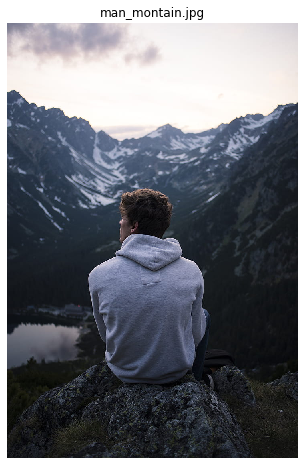

In [2]:
img_paths = os.listdir('test_examples/')
plt.figure(figsize=(16,8))

for idx, img_path in enumerate(img_paths):
    img = plt.imread('test_examples/'+img_path)
    #plt.subplot(2,3,idx+1)
    plt.imshow(np.real(img))
    plt.title(img_path)
    plt.axis('off')
plt.show() 

In [3]:
model = torch.load('image-captioning-model.pth')
model.eval()

CNNtoRNN(
  (encoderCNN): EncoderCNN(
    (inception): Inception3(
      (Conv2d_1a_3x3): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2a_3x3): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2b_3x3): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_3b_1x1): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_4a_3x3): BasicConv2d(
        (conv): Co

In [4]:
transform = transforms.Compose(
    [
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [5]:
def caption_all_images(image_paths):
    for img_path in image_paths:
        plt.figure(figsize=(6,4))
        full_path = 'test_examples/' + img_path
        img = transform(Image.open(full_path).convert("RGB")).unsqueeze(0)
        caption = ' '.join(model.caption_image(img.to('cuda'), dataset.vocab)[1:-1])
        read_img = plt.imread(full_path)
        plt.imshow(np.real(read_img))
        plt.axis("off")
        plt.title(caption)
        plt.show()

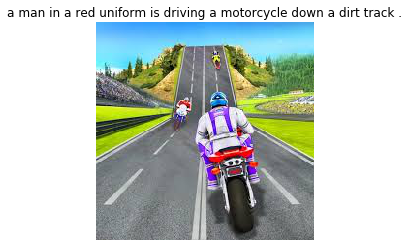

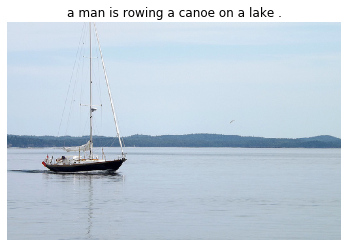

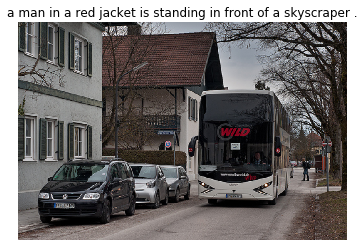

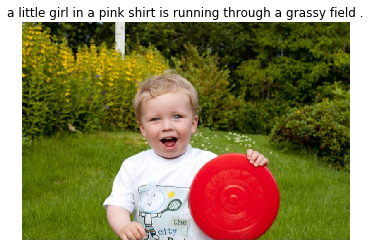

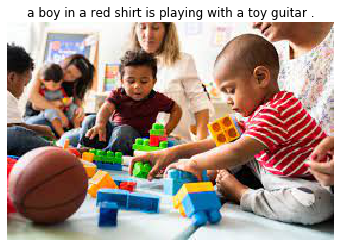

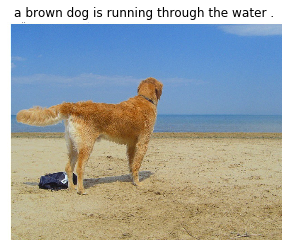

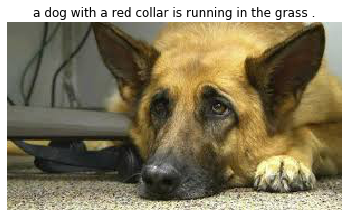

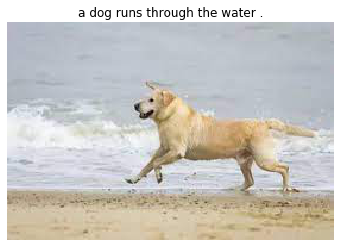

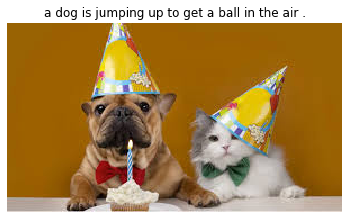

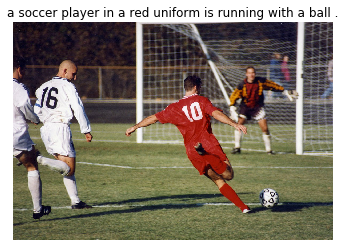

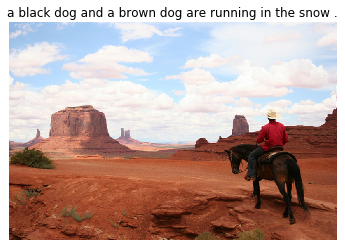

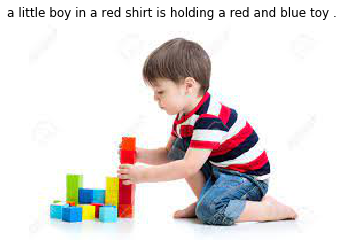

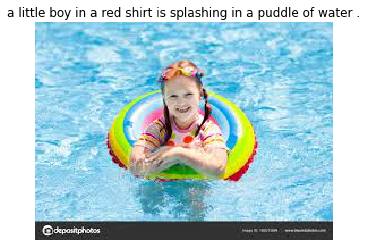

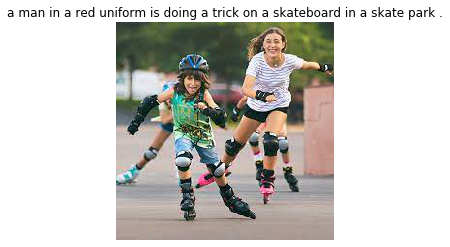

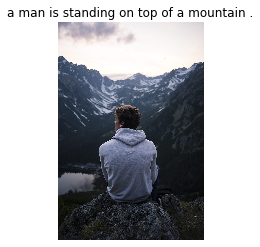

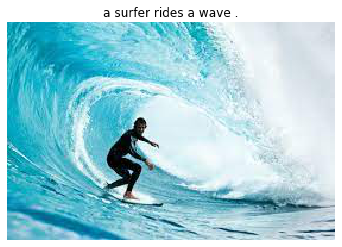

In [10]:
caption_all_images(os.listdir('test_examples'))